In [1]:
#!/usr/bin/python
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
batch_siz = 128

2.1.0


In [8]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    'G://desktop/githubcode&VS_code/tf_emotion_detector/train',
    target_size=(48,48),
    class_mode='categorical'
)
print(train_generator)

Found 35887 images belonging to 7 classes.


In [3]:

model = tf.keras.models.Sequential()
       
model.add(tf.keras.layers.Conv2D(32, (1, 1), strides=1, padding='same', input_shape=(48, 48, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7))
model.add(tf.keras.layers.Activation('softmax'))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0

In [4]:
logdir = os.path.join('callbacks')#for win10
#for mac:
#logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'emtion_model.h5')

callbacks = [
    tf.keras.callbacks.TensorBoard(logdir),
    tf.keras.callbacks.ModelCheckpoint(output_model_file, save_weights_only = False, monitor = 'accuracy', save_best_only = True)
]

history = model.fit(
    train_generator,
    steps_per_epoch=800/(batch_siz/32),
    nb_epoch=100,
    validation_data=None,
    verbose=1,
    callbacks = callbacks
)

  ...
    to  
  ['...']
Train for 200.0 steps
Epoch 1/100
200/200 [==============================] - 91s 456ms/step - loss: 1.8344 - accuracy: 0.2363
Epoch 2/100
200/200 [==============================] - 75s 375ms/step - loss: 1.8044 - accuracy: 0.2477
Epoch 3/100
200/200 [==============================] - 74s 372ms/step - loss: 1.7768 - accuracy: 0.2627
Epoch 4/100
200/200 [==============================] - 74s 372ms/step - loss: 1.7602 - accuracy: 0.2723
Epoch 5/100
200/200 [==============================] - 75s 377ms/step - loss: 1.7126 - accuracy: 0.3120
Epoch 6/100
200/200 [==============================] - 77s 385ms/step - loss: 1.6358 - accuracy: 0.3587
Epoch 7/100
200/200 [==============================] - 74s 371ms/step - loss: 1.5812 - accuracy: 0.3745
Epoch 8/100
200/200 [==============================] - 76s 380ms/step - loss: 1.5524 - accuracy: 0.3870
Epoch 9/100
200/200 [==============================] - 75s 373ms/step - loss: 1.5336 - accuracy: 0.4022
Epoch 10/100
200/

200/200 [==============================] - 85s 424ms/step - loss: 0.5898 - accuracy: 0.7953
Epoch 78/100
200/200 [==============================] - 78s 388ms/step - loss: 0.5725 - accuracy: 0.8029
Epoch 79/100
200/200 [==============================] - 78s 392ms/step - loss: 0.5861 - accuracy: 0.7977
Epoch 80/100
200/200 [==============================] - 79s 396ms/step - loss: 0.5439 - accuracy: 0.8095
Epoch 81/100
200/200 [==============================] - 79s 396ms/step - loss: 0.5970 - accuracy: 0.7892
Epoch 82/100
200/200 [==============================] - 78s 390ms/step - loss: 0.5656 - accuracy: 0.8014
Epoch 83/100
200/200 [==============================] - 80s 398ms/step - loss: 0.5375 - accuracy: 0.8134
Epoch 84/100
200/200 [==============================] - 78s 390ms/step - loss: 0.5299 - accuracy: 0.8134
Epoch 85/100
200/200 [==============================] - 79s 395ms/step - loss: 0.5579 - accuracy: 0.8011
Epoch 86/100
200/200 [==============================] - 79s 395ms/st

In [5]:
history.history

{'loss': [1.8342848634824434,
  1.8044453418254853,
  1.7767990177869797,
  1.7602454125881195,
  1.7126030653715134,
  1.6358411490917206,
  1.581150195002556,
  1.5523615062236786,
  1.533627736568451,
  1.4869280099868774,
  1.4596417927742005,
  1.4435466344166414,
  1.4231078147888183,
  1.392107733488083,
  1.3866552466154098,
  1.3504486927390098,
  1.3348336431384087,
  1.3198095831274985,
  1.3195479217171668,
  1.262301519215107,
  1.2486325317621232,
  1.2740627464652061,
  1.2472225475311278,
  1.2313154008984566,
  1.2373475214352938,
  1.2188540995121002,
  1.1814219057559967,
  1.1842443838531127,
  1.1490888580679894,
  1.1355783778429032,
  1.1422994858026505,
  1.12538985311985,
  1.1146720871329308,
  1.1083362391591072,
  1.098597356915642,
  1.0613129541277886,
  1.0558353281021118,
  1.073245295882225,
  1.0484486630558967,
  1.035875395834446,
  1.0139652216434478,
  0.9848127928755789,
  0.9732671937346459,
  0.9582869353890419,
  0.9877161625027656,
  0.9648603

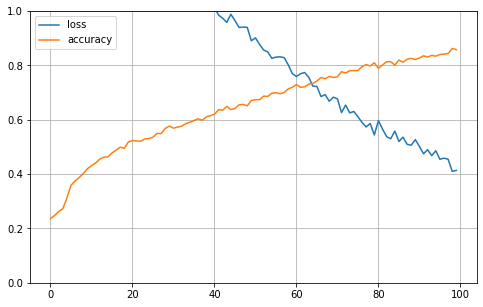

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)